      initial_mass1  initial_mass2
0           0.50000           0.50
1           0.50000           0.50
2           0.50000           0.50
3           0.50000           0.50
4           0.50000           0.50
...             ...            ...
2023        4.05001           1.35
2024        1.40000           1.40
2025        1.40000           1.40
2026        2.10000           1.40
2027        2.80000           1.40

[2028 rows x 2 columns]


MovieWriter imagemagick unavailable; using Pillow instead.


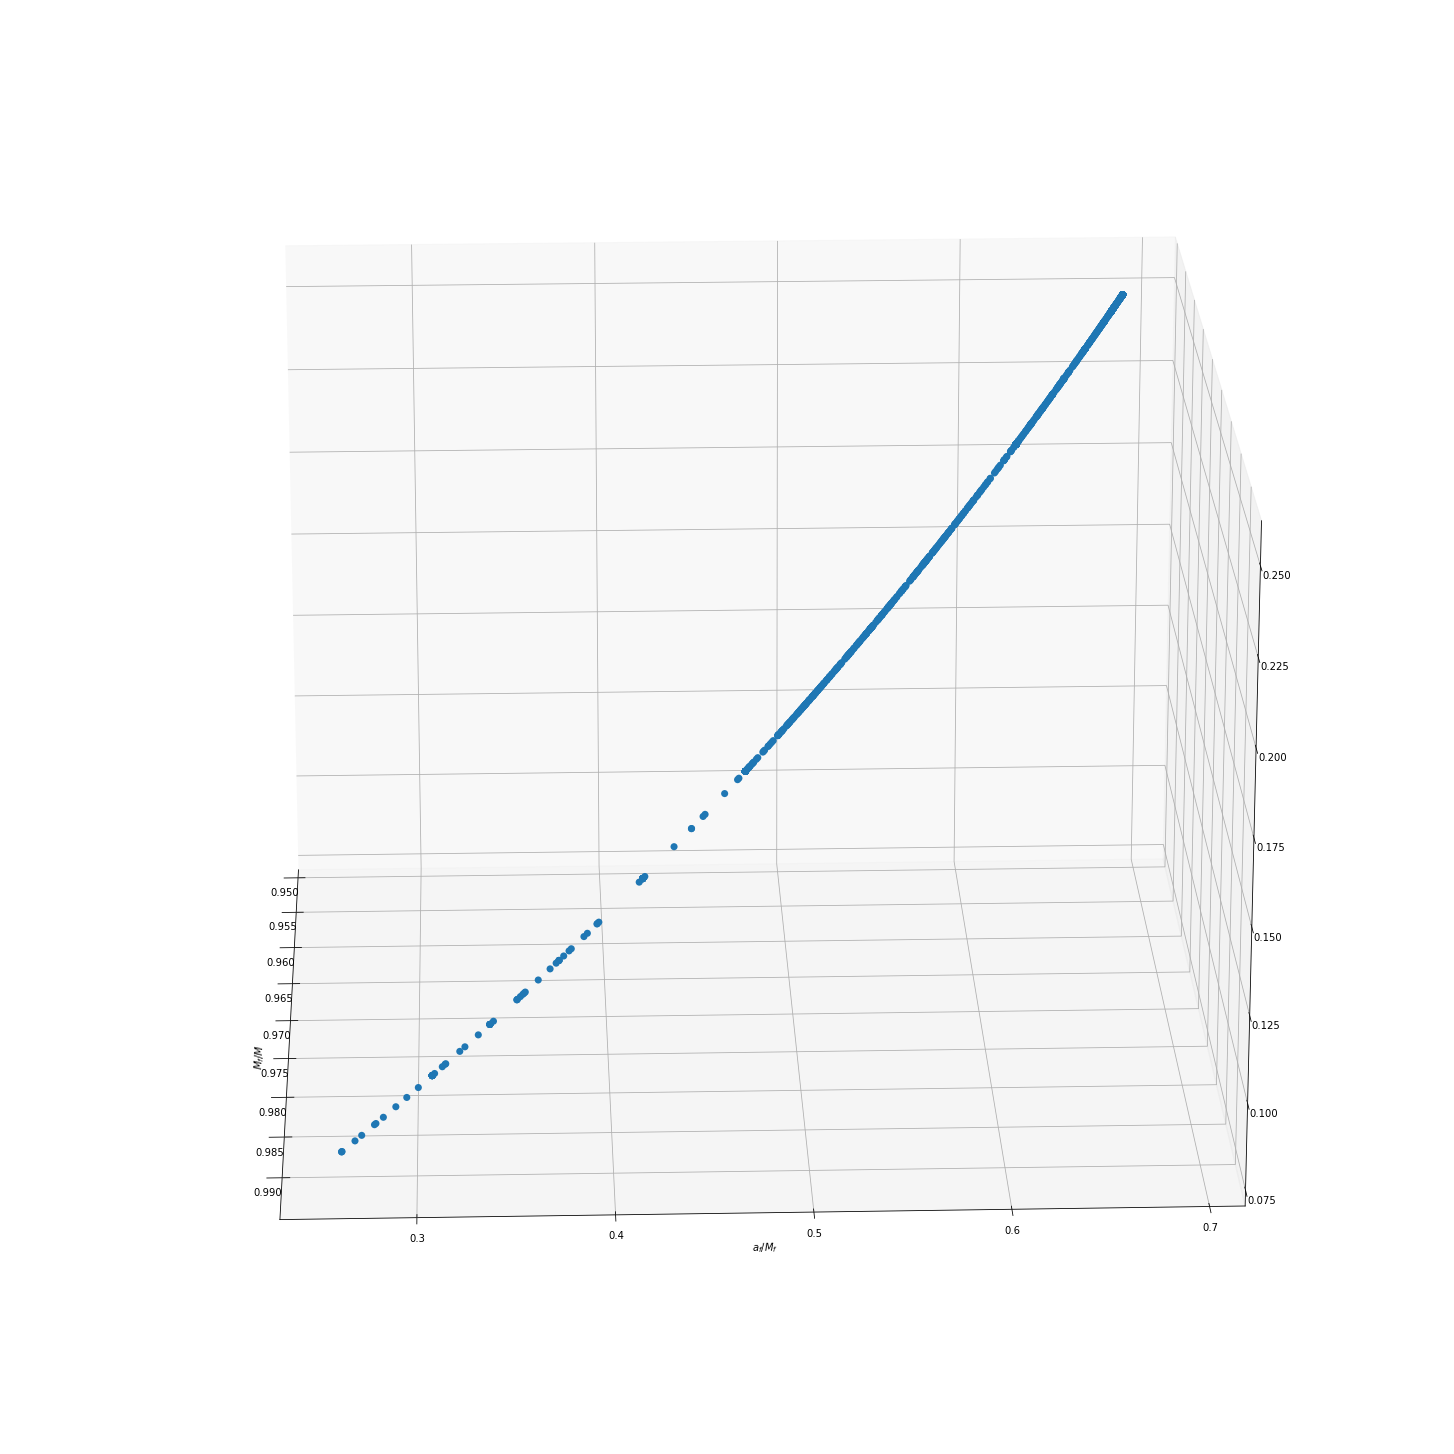

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 20 20:37:30 2022

@author: tanay
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
def Mf_af_func(m1,m2):
    nu=(m1*m2)/(m1+m2)**2
    return 1+nu*(np.sqrt(8/9)-1)-0.4333*(nu**2)-0.4392*(nu**3), np.sqrt(12)*nu-3.871*(nu**2)+4.028*(nu**3),nu
df = pd.read_json("catalog.json")
#df.head(0)
print(df[['initial_mass1','initial_mass2']])
M1=df['initial_mass1']
M2=df['initial_mass2']
step=1
Ans= Mf_af_func(M1,M2)
#Mf=Mf_af_func(M1,M2)[0]
#af=Mf_af_func(M1,M2)[1]
#mu=Mf_af_func(M1,M2)[2]
#header = ['Mf', 'af', 'nu']
#with open('Mf_af.csv', 'w', encoding='UTF8', newline='') as file:
    # Create a writer object
#    writer = csv.writer(file)
    # Write the header
#    writer.writerow(header)
#    writer.writerows(Ans)
fig = plt.figure()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
ax = fig.add_subplot(111, projection='3d')
#ax.set_facecolor((0.5, 0.5, 0.5))
ax.scatter(Mf_af_func(M1,M2)[0], Mf_af_func(M1,M2)[1], Mf_af_func(M1,M2)[2],alpha=1.0,s=50,marker='o',linewidth=0)
plt.axis('on')
plt.xlabel('${M_{f}}/{M}$')
plt.ylabel('${a_{f}}/{M_{f}}$')
#plt.zlabel('Reduced Mass')
fig.set_size_inches(20, 20)
def update(i, fig, ax):
    ax.view_init(elev=20., azim=i)
    return fig, ax
anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), repeat=True, fargs=(fig, ax))
anim.save('Mf_af_func.gif', dpi=80, writer='imagemagick', fps=24)